## load dataset


In [2279]:

import pandas as pd
import numpy as np

df = pd.read_csv('kidney_disease.csv')
df = df.sample(frac=0.2, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 209 to 289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              80 non-null     int64  
 1   age             76 non-null     float64
 2   bp              79 non-null     float64
 3   sg              70 non-null     float64
 4   al              70 non-null     float64
 5   su              70 non-null     float64
 6   rbc             48 non-null     object 
 7   pc              67 non-null     object 
 8   pcc             80 non-null     object 
 9   ba              80 non-null     object 
 10  bgr             71 non-null     float64
 11  bu              76 non-null     float64
 12  sc              76 non-null     float64
 13  sod             67 non-null     float64
 14  pot             67 non-null     float64
 15  hemo            71 non-null     float64
 16  pcv             67 non-null     object 
 17  wc              64 non-null     object 

In [2280]:
df = pd.read_csv('kidney_disease.csv')
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [2281]:
df = df.drop(['id','age'], axis=1)

In [2282]:
df.sample()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
292,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,89.0,42.0,...,52,10200,5.0,no,no,no,good,no,no,notckd


In [2283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             398 non-null    obj

In [2284]:
numerical = []
catgcols = []
for col in df.columns:
    if df[col].dtype=="float64" or col == 'pcv':
        if col == 'pcv':
            df[col] = pd.to_numeric(df[col], errors='coerce')
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df.fillna({col: df[col].median()}, inplace=True)
    else:
        df.fillna({col: df[col].mode()[0]}, inplace=True)


In [2285]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']

In [2286]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [2287]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [2288]:
df['classification'] = df['classification'].replace(['ckd\t'],'ckd')

In [2289]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [2290]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

In [2291]:
df[dep_col].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

## transformasi dtaset

In [2292]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])


In [2293]:
df['classification'] = le.fit_transform(df['classification'])

In [2294]:
wc = [val*100 for val in df['wc']]
rc = [val/10 if val >= 10  else val for val in df['rc']]
dm = [1 if val == 4 else 0 for val in df['dm']]
df['wc'] = wc
df['rc'] = rc
df['dm'] = dm

In [2295]:
x = df[ind_col]  #feature
y = df[dep_col]  #label

In [2296]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Create the base model (e.g., Random Forest)
model = DecisionTreeClassifier()
feature_names = [f"{i}" for i in ind_col]

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE to the data
rfe.fit(x, y)

selected_features = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]
not_selected_features = [feature for feature, selected in zip(feature_names, rfe.support_) if not selected]

feature_df = pd.DataFrame({
    "Feature Name": feature_names,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
})

# Check selected features
print("Selected Features:", rfe.support_)  # Boolean mask of selected features
print("Feature Ranking:", rfe.ranking_)   # Rank of each feature (1 = selected)

# Display results
print("Selected Features:")
print(selected_features)  # Only selected feature names
print("Not Selected Features:")
print(not_selected_features) 
print("\nFeature Rankings:")
print(feature_df.sort_values(by="Ranking"))  # Display all features with rankings


Selected Features: [ True  True False False False False False False False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 3 9 8 7 6 5 4 1 1 1 2 1 1 1 1 1 1 1 1 1 1]
Selected Features:
['bp', 'sg', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Not Selected Features:
['al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'pot']

Feature Rankings:
   Feature Name  Selected  Ranking
0            bp      True        1
1            sg      True        1
14          pcv      True        1
15           wc      True        1
13         hemo      True        1
11          sod      True        1
10           sc      True        1
9            bu      True        1
19          cad      True        1
22          ane      True        1
21           pe      True        1
20        appet      True        1
17          htn      True        1
18           dm      True        1
16           rc      True        1


In [2297]:
df.drop(not_selected_features, axis=1, inplace=True)


In [2298]:
df.to_csv('kidney_clean.csv', index=False)

In [2299]:
from sklearn.model_selection import train_test_split


X = df.drop('classification', axis=1)
y = df['classification']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Membuat Model Decision Tree

Akurasi Data Training = 0.9958333333333333
Akurasi Data Testing = 0.99375 

Nilai Classfication Report : 
               precision    recall  f1-score   support

           0     1.0000    0.9900    0.9950       100
           1     0.9836    1.0000    0.9917        60

    accuracy                         0.9938       160
   macro avg     0.9918    0.9950    0.9934       160
weighted avg     0.9939    0.9938    0.9938       160



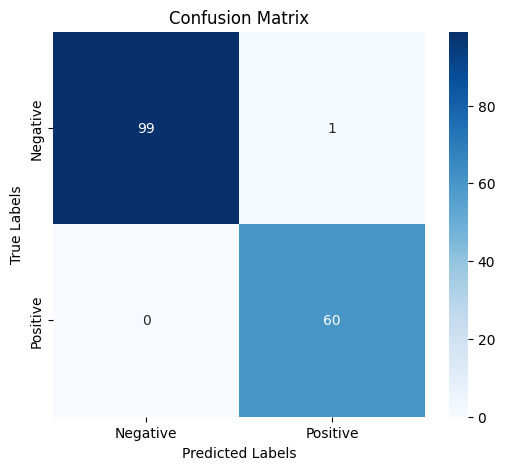

In [2300]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns


dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Nilai Classfication Report : \n {classification_report(y_test, dtc.predict(x_test), digits=4)}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

# Menambahkan label
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## SIMULASI MODEL

In [2309]:
input_data = (1.025, 15, 1.2, 135, 5, 14.8, 30, 52, 37, 0, 3, 1, 0, 0, 0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction==0):
    print ('Pasien Tidak Terkena Penyakit Ginjal Kronis')
else:
    print ('Pasien Terkena Penyakit Ginjal Kronis')



[1]
Pasien Terkena Penyakit Ginjal Kronis


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## visualisasi Decision Tree

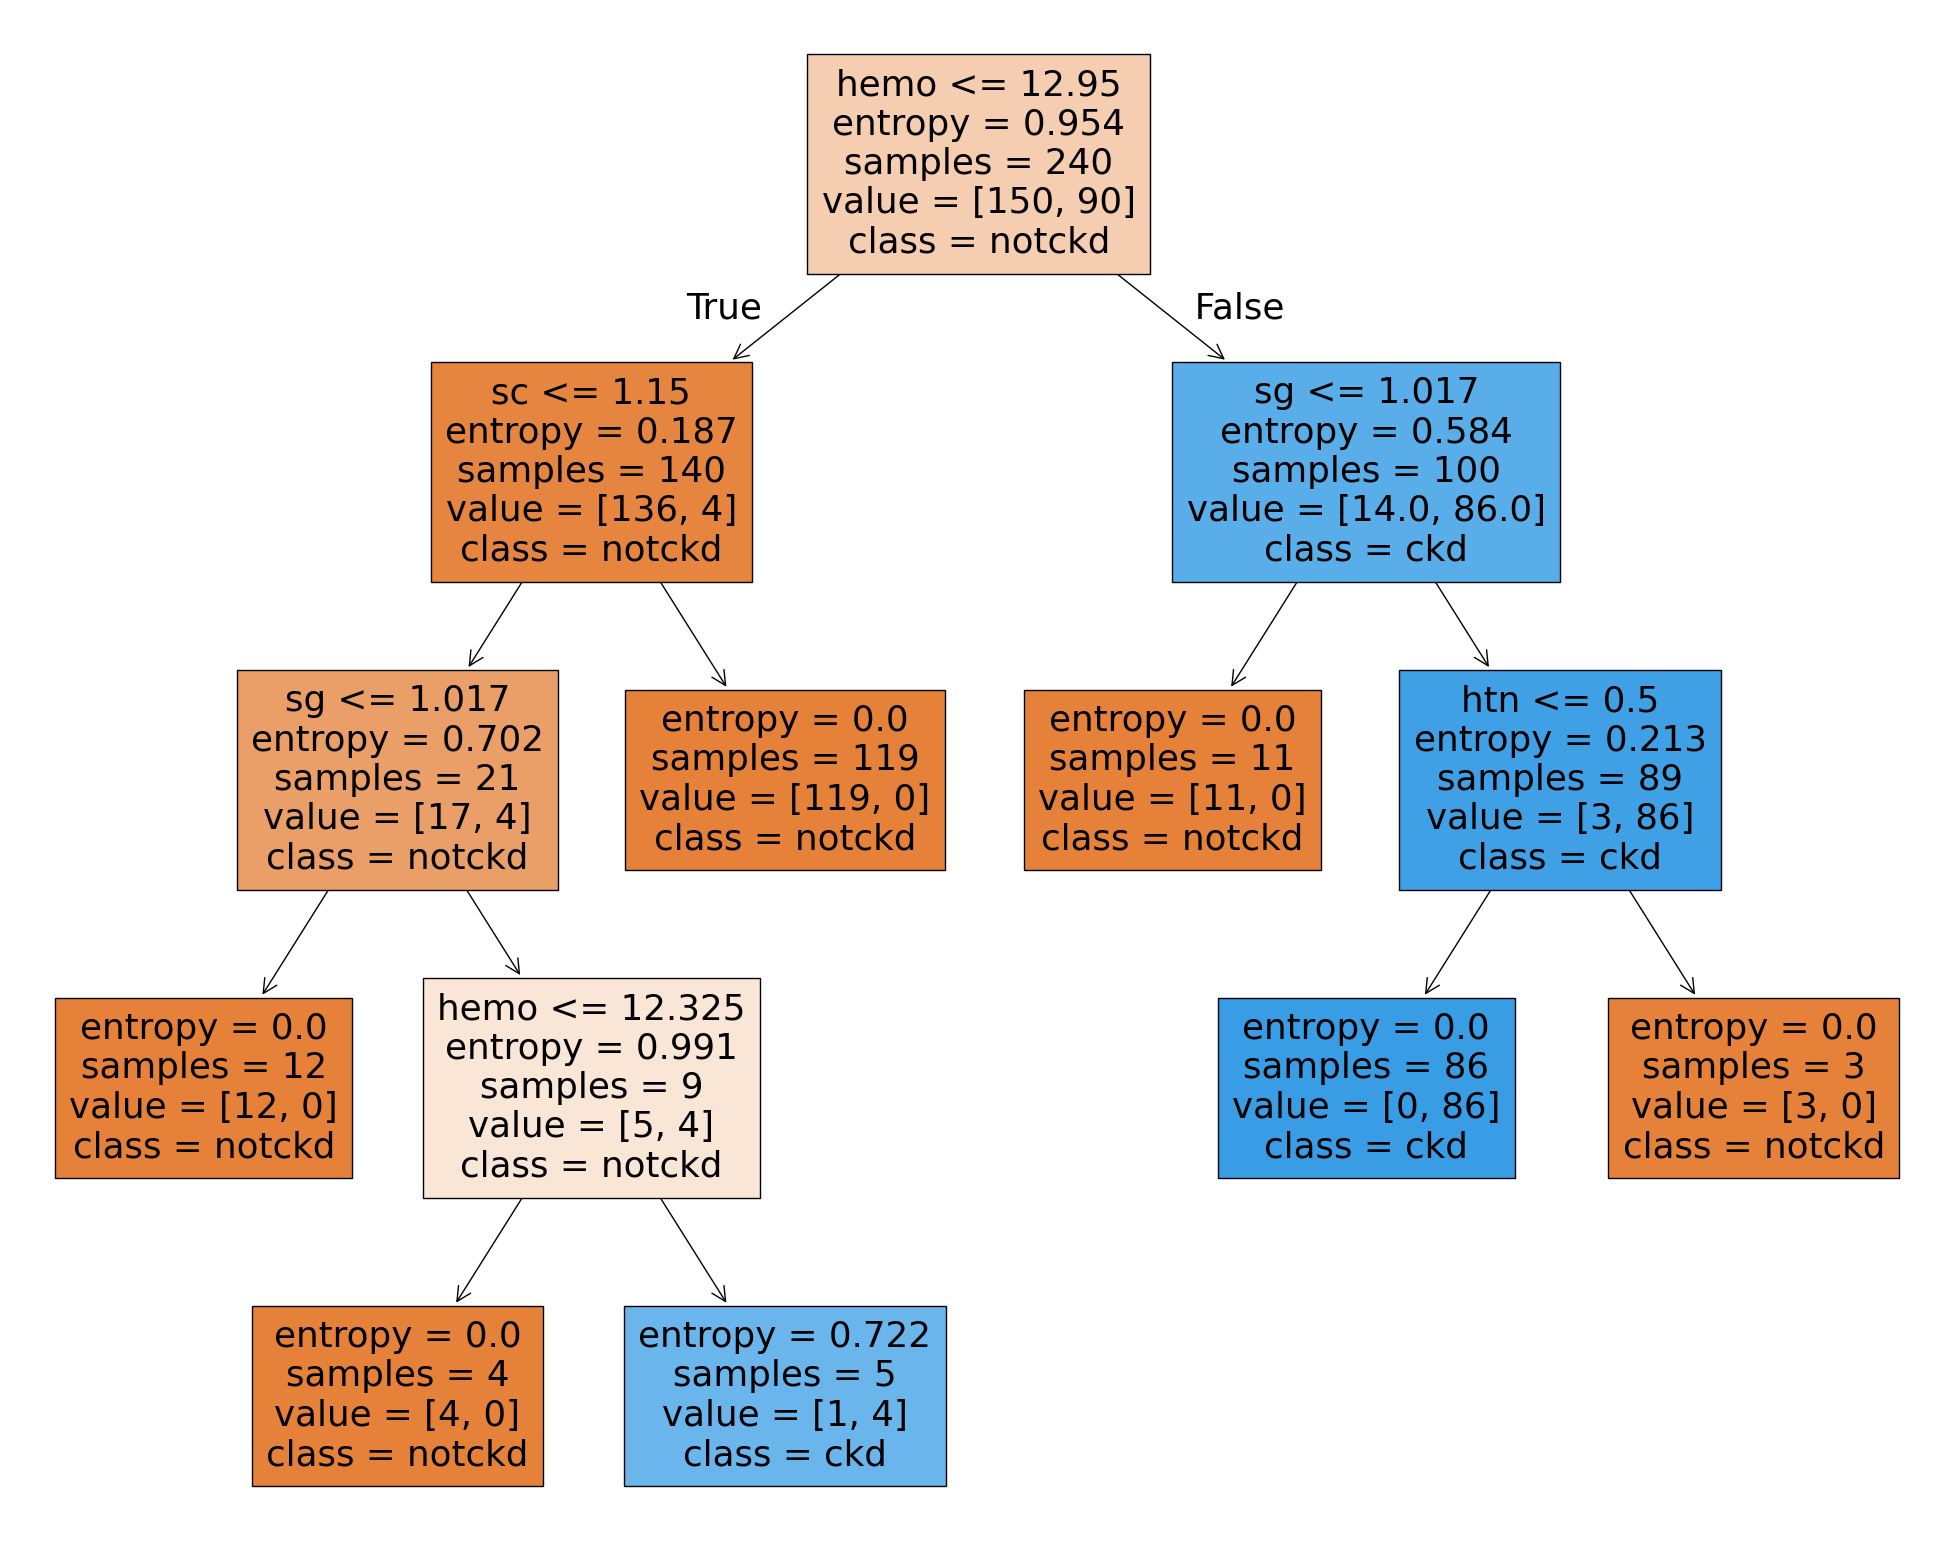

In [2302]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=selected_features,
                   class_names=['notckd','ckd'],
                   filled=True)

## Export to pkl

In [2303]:
import joblib as jb

In [2304]:
jb.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']